# Análisis de Sentimiento avanzado con Transformers

Se analiza un texto extenso (por ejemplo, una reseña o comentario compuesto de varios párrafos) dividiéndolo en oraciones

Se procesa cada oración con un pipeline de análisis de sentimiento

Se agrupan y visualizan los resultados (por ejemplo, contando las etiquetas de sentimiento) mediante un gráfico de barras

**By Jean Carlo Alvarez**

# Instalcion de Librerias

In [6]:
!pip install -q spacy transformers
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 58.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


**!pip install:** Usa el gestor de paquetes pip para instalar bibliotecas en el entorno de Python

**spacy**: Biblioteca para procesamiento de lenguaje natural (NLP)

**transformers**: Biblioteca de Hugging Face que permite usar modelos avanzados de NLP, como BERT, GPT, etc

**spacy download: **Comando de spaCy para descargar modelos preentrenados de lenguaje

**en_core_web_sm**: Modelo en inglés de spaCy
- en o es → Inglés/Español
- core → Modelo principal de spaCy
- web → Entrenado en textos de la web
- sm (small) → Modelo pequeño (más rápido, pero menos preciso)

**Otros modelos disponibles:**

- en_core_web_md (Medium) → Modelo mediano, más preciso que sm
- en_core_web_lg (Large) → Modelo grande, mejor precisión pero más pesado
- en_core_web_trf (Transformer) → Modelo basado en Transformers de Hugging Face, el más preciso pero más lento

**Qué pasa si cambias el modelo?**

Modelos más grandes mejoran la precisión en el análisis de texto (tokenización, lematización, entidades, etc.)

Modelos más pequeños son más rápidos pero pueden cometer más errores


# Importamos Librerias

In [7]:
from transformers import pipeline
import matplotlib.pyplot as plt
import spacy
import pandas as pd

**transformers** es una biblioteca de Hugging Face que permite usar modelos avanzados de inteligencia artificial para NLP

**pipeline** es una función de alto nivel que permite cargar modelos preentrenados fácilmente sin necesidad de configurar todo manualmente

**Ejemplo de uso de pipeline:**

    classifier = pipeline("sentiment-analysis")  # Cargar modelo de análisis de sentimientos

  - "sentiment-analysis" → Carga un modelo para clasificar emociones en texto

**Otros modelos disponibles:**

- "text-generation" → Generación de texto (GPT-2, Llama, etc.)
- "translation_en_to_fr" → Traducción de inglés a francés
- "ner" → Reconocimiento de entidades nombradas
- "question-answering" → Responde preguntas con base en un contexto

**matplotlib.pyplot** es una biblioteca para crear gráficos y visualizaciones en Python

**spacy** es una biblioteca de procesamiento de lenguaje natural (NLP)

Se usa para tareas como tokenización, lematización, análisis sintáctico y reconocimiento de entidades

**pandas** es una biblioteca para manejo y análisis de datos en formato tabular

**Por qué importar pandas aquí?**
Si se trabaja con texto en archivos como CSV o bases de datos, pandas ayuda a manipular los datos antes de pasarlos a spaCy

# Cargar el modelo pre-entrenado

In [8]:
nlp = spacy.load("en_core_web_sm")

**spacy.load()** Función de spaCy que carga un modelo preentrenado de procesamiento de lenguaje natural (NLP)

- "en_core_web_sm" → Modelo específico de inglés, que es:
- en → Inglés
- core → Modelo principal de spaCy
- web → Entrenado con datos de texto web
- sm (small) → Versión pequeña del modelo, rápida pero con menor precisión

**Modelos en inglés**

- "en_core_web_sm"	Modelo pequeño, rápido, menor precisión
- "en_core_web_md"	Modelo mediano, equilibrio entre velocidad y precisión
- "en_core_web_lg"	Modelo grande, más preciso pero más lento
- "en_core_web_trf"	Modelo con Transformers, el más preciso pero muy pesado

**Modelos en español**
- "es_core_news_sm"  Pequeño
- "es_core_news_md"  Mediano
- "es_core_news_lg"  Grande
- "es_core_news_trf"  Basado en Transformers

**Qué pasa si cambias el modelo?**
Si usas un modelo más grande (md o lg), el análisis será más preciso, pero tomará más memoria y será más lento

Si usas un modelo más pequeño (sm), el análisis será más rápido, pero podría ser menos preciso en tareas complejas

**nlp**  Objeto que contiene el modelo cargado y puede analizar texto

# Configurar el pipeline de análisis de sentimiento

In [9]:
sentiment_pipeline = pipeline(
    "sentiment-analysis",
    model="distilbert-base-uncased-finetuned-sst-2-english"
)

Device set to use cpu


Se utiliza el modelo **"distilbert-base-uncased-finetuned-sst-2-english"**, que retorna etiquetas "POSITIVE" o "NEGATIVE"

**pipeline()**  Es una función de transformers (biblioteca de Hugging Face) que carga un modelo preentrenado y facilita su uso sin necesidad de configuraciones avanzadas

**"sentiment-analysis"**  Especifica que se usará análisis de sentimientos, es decir, clasificar texto como positivo o negativo

**model="distilbert-base-uncased-finetuned-sst-2-english"**  Indica qué modelo específico se usará

**"distilbert-base-uncased**"  Modelo basado en DistilBERT, una versión más ligera y rápida de BERT

**"finetuned-sst-2-english"**  Entrenado con el Stanford Sentiment Treebank (SST-2), un dataset de análisis de sentimientos en inglés

**sentiment_pipeline**  Almacena el modelo para poder usarlo después

**Qué pasa si cambiamos el modelo?**
Hugging Face tiene muchos modelos disponibles. Algunos ejemplos alternativos:

**Para inglés:**
- "bert-base-uncased" → Modelo estándar de BERT sin distinción de mayúsculas/minúsculas

- "roberta-large-sentiment" → Basado en RoBERTa, más preciso pero más pesado

**Para español:**

**pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")**	Modelo multilingüe para español

**Cuál modelo elegir?**

- Análisis de sentimientos	distilbert-base-uncased-finetuned-sst-2-english (BERT) o twitter-roberta-base-sentiment (RoBERTa)

- Generación de texto	gpt2, gpt-neo, gpt-4 (API)

- Traducción	t5-small, m2m100_418M

- Resumen de texto	facebook/bart-large-cnn, t5-small

- Modelo multilingüe	xlm-roberta-base, bert-base-multilingual-cased


# Texto de ejemplo(simula una reseña)

In [10]:
texto_resena = (
    "I recently purchased the new SmartHome Hub and I must say, the experience has been quite transformative. "
    "The device integrates seamlessly with various smart appliances, offering a user-friendly interface that is both intuitive and reliable. "
    "However, during the initial setup, I encountered several technical difficulties which were frustrating at first. "
    "The customer support team was prompt in addressing my concerns, although the resolution process took longer than expected. \n\n"
    "On the positive side, the overall performance of the SmartHome Hub has exceeded my expectations. "
    "Its robust connectivity and advanced features allow for a highly personalized experience. "
    "I especially appreciate the regular software updates that continuously enhance its capabilities. \n\n"
    "In conclusion, while there were some setbacks at the start, the product ultimately delivers significant value. "
    "I would recommend it to anyone looking to upgrade their smart home ecosystem, though I advise potential buyers to be patient during the setup phase."
)

La variable texto_resena contiene el texto de varias reseñas de simulacion.

# Usar spaCy para segmentar el texto en oraciones

In [11]:
doc_sent = nlp(texto_resena)
oraciones = [sent.text.strip() for sent in doc_sent.sents if sent.text.strip() != ""]

**nlp(texto_resena)**  Analiza el texto texto_resena usando el modelo spaCy

**doc_sent**  Almacena el resultado del análisis en un objeto Doc, que permite acceder a oraciones, palabras, entidades y más

**[sent.text.strip() for sent in doc_sent.sents if sent.text.strip() != ""]**
- **doc_sent.sents**  Extrae las oraciones del texto procesado

- **sent.text.strip(**)  Obtiene el texto de cada oración y elimina espacios extra al inicio y final

- **if sent.text.strip() != ""**  Evita oraciones vacías

**Como funciona spaCy para dividir oraciones?**

spaCy usa puntos (.), signos de exclamación (!), interrogación (?) y reglas lingüísticas para identificar oraciones

Si el texto tiene errores gramaticales o puntuación incorrecta, spaCy podría fallar en la segmentación




# Aplicar el análisis de sentimiento a cada oración

In [12]:
resultados = []
for idx, oracion in enumerate(oraciones):
    # Cada resultado es una lista con un diccionario, extraemos el primero
    res = sentiment_pipeline(oracion)[0]
    res["Oracion"] = oracion
    res["Indice"] = idx
    resultados.append(res)

**resultados = []** Se crea una lista vacía resultados donde se guardarán los análisis de sentimiento de cada oración

**for idx, oracion in enumerate(oraciones):**
- **enumerate(oraciones)**  Recorre la lista oraciones, proporcionando:
  - **idx**  Índice de la oración en la lista (0, 1, 2...)
  - **oracion**  Texto de la oración en la iteración actual

**res = sentiment_pipeline(oracion)[0]**

- **sentiment_pipeline(oracion)** Usa un modelo de Hugging Face (pipeline("sentiment-analysis")) para analizar el sentimiento de la oración

- **[0]** sentiment_pipeline() devuelve una lista de diccionarios, por lo que tomamos el primer (y único) resultado

**Ejemplo de salida de sentiment_pipeline(oracion)[0]**

    {
      "label": "POSITIVE",
      "score": 0.98
    }

**res["Oracion"] = oracion**

**res["Indice"]  = idx**

"Oracion" Se añade el texto de la oración dentro del diccionario res

"Indice"  Se almacena el índice de la oración

**Ejemplo de cómo queda res después de añadir información extra**

      {
        "label": "POSITIVE",
        "score": 0.98,
        "Oracion": "Este restaurante es increíble.",
        "Indice": 0
      }

**resultados.append(res)**

Cada resultado de sentimiento se guarda en resultados



# Convertir en un DataFrame para visualizar y analizar

In [13]:
df_sentimientos = pd.DataFrame(resultados)
print("\nResultados del análisis de sentimiento por oración:")
display(df_sentimientos)


Resultados del análisis de sentimiento por oración:


,label,score,Oracion,Indice
0,POSITIVE,0.999371,I recently purchased the new SmartHome Hub and...,0
1,POSITIVE,0.999335,The device integrates seamlessly with various ...,1
2,NEGATIVE,0.998995,"However, during the initial setup, I encounter...",2
3,POSITIVE,0.954690,The customer support team was prompt in addres...,3
4,POSITIVE,0.999441,"On the positive side, the overall performance ...",4
5,POSITIVE,0.999799,Its robust connectivity and advanced features ...,5
6,POSITIVE,0.999776,I especially appreciate the regular software u...,6
7,POSITIVE,0.999809,"In conclusion, while there were some setbacks ...",7
8,POSITIVE,0.799062,I would recommend it to anyone looking to upgr...,8


**pd.DataFrame(resultados)** Convierte la lista de diccionarios resultados en una tabla estructurada con pandas

**df_sentimientos**  Contiene la información del análisis de sentimiento para cada oración

**display(df_sentimientos)**  Muestra la tabla de una forma más legible e interactiva (especialmente en Jupyter Notebook y Google Colab)



# Agrupar y contar la cantidad de oraciones por etiqueta de sentimiento

In [14]:
conteo_sentimientos = df_sentimientos["label"].value_counts()
print("\nConteo de etiquetas de sentimiento:")
print(conteo_sentimientos)


Conteo de etiquetas de sentimiento:
label
POSITIVE    8
NEGATIVE    1
Name: count, dtype: int64


**df_sentimientos["label"]**  Selecciona la columna "label" del DataFrame, que contiene las etiquetas de sentimiento (POSITIVE, NEGATIVE, etc.)

**.value_counts()**  Cuenta cuántas veces aparece cada etiqueta y devuelve un conteo de frecuencias en un nuevo objeto tipo Series



# Visualizar el conteo con un gráfico de barras

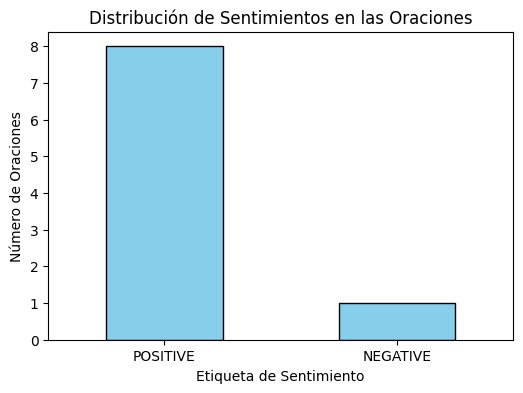

In [15]:
plt.figure(figsize=(6,4))
conteo_sentimientos.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribución de Sentimientos en las Oraciones")
plt.xlabel("Etiqueta de Sentimiento")
plt.ylabel("Número de Oraciones")
plt.xticks(rotation=0)
plt.show()